# This notebook is to create visuals. The environment is the normal Jupyter Lab notebook that cannot be used with Geopandas

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
food_obesity = pd.read_csv('./data/food_obesity.csv')
food_obesity.head()

,Tract,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Community Area,HCSOBP_2016-2018
0,17031010100,4854,2302,0,218.0,4.49,0,1,0,1,...,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0,1,33.5
1,17031010201,6450,2463,0,163.0,2.53,0,0,0,0,...,2350.0,299.0,6.0,48.0,1435.0,2049.0,751.0,851.0,1,33.5
2,17031010202,2818,1115,0,315.0,11.18,0,0,0,0,...,953.0,143.0,1.0,18.0,466.0,789.0,464.0,232.0,1,33.5
3,17031010300,6236,2826,0,791.0,12.68,0,1,0,1,...,1722.0,346.0,16.0,21.0,864.0,1169.0,993.0,470.0,1,33.5
4,17031010400,5042,2098,0,1349.0,26.76,0,0,0,0,...,729.0,562.0,5.0,17.0,388.0,480.0,655.0,277.0,1,33.5


In [7]:
food_obesity.columns

Index(['Tract', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS',
       'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20',
       'LATractsVehicle_20', 'TractLOWI', 'TractKids', 'TractSeniors',
       'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN',
       'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP',
       'Community Area', 'HCSOBP_2016-2018'],
      dtype='object')

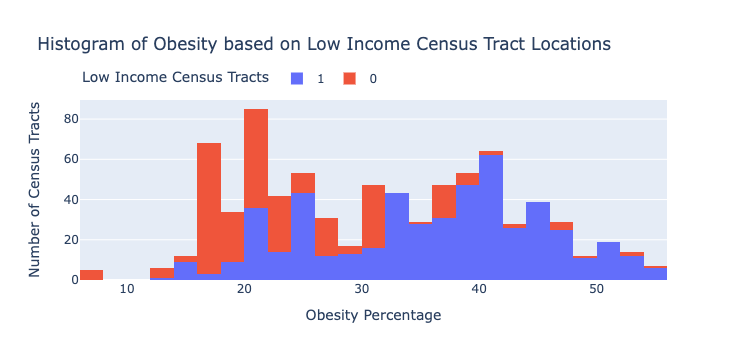

In [218]:
fig = px.histogram(food_obesity, x = 'HCSOBP_2016-2018', color = 'LowIncomeTracts',
                  title = 'Histogram of Obesity based on Low Income Census Tract Locations',
                  labels = {'HCSOBP_2016-2018' : 'Obesity Percentage', 
                            'LowIncomeTracts' : 'Low Income Census Tracts'})
fig.update_layout(legend_orientation = 'h')
fig.update_layout(legend = dict( y = 1.2))
fig.update_yaxes(title = 'Number of Census Tracts')
fig.show()

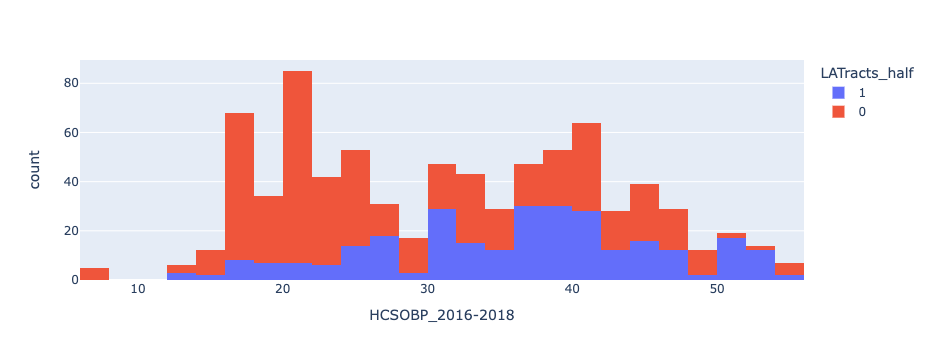

In [12]:
fig = px.histogram(food_obesity, x = 'HCSOBP_2016-2018', color = 'LATracts_half' )
fig.show()

In [165]:
total_pop

2676066

In [209]:
total_pop = food_obesity['Pop2010'].sum()
LA_pop = food_obesity.groupby('LATracts_half')['Pop2010'].sum()
LA_pop_1 = [LA_pop[1]]
LA_pop_0 = [LA_pop[0]]

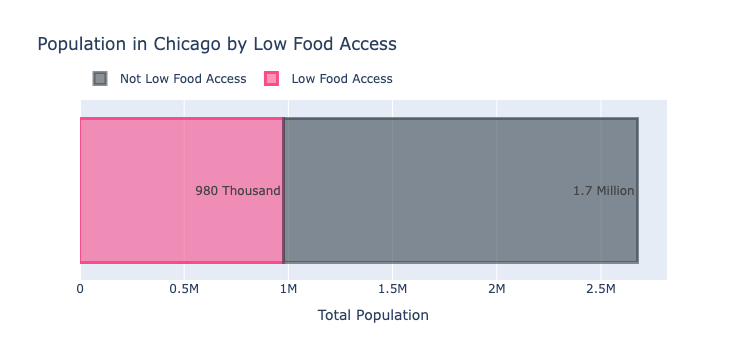

In [211]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = LA_pop_1,
    y = ['Population'],
    orientation = 'h',
    name = 'Low Food Access',
    text = ['980 Thousand'],
    marker = dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))

fig.add_trace(go.Bar(
    x = LA_pop_0,
    y = ['Population'],
    orientation = 'h',
    name = 'Not Low Food Access',
    text = ['1.7 Million'],
    marker = dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 0.6)', width=3)
    )    
))

fig.update_layout(title = 'Population in Chicago by Low Food Access')
fig.update_layout(legend_orientation = 'h')
fig.update_layout(legend = dict( y = 1.2))
fig.update_layout(barmode = 'stack') 
fig.update_yaxes(title ='', showticklabels = False)
fig.update_xaxes(title = 'Total Population')
fig.show();

In [221]:
demographics_race = ['TractBlack','TractWhite','TractHispanic', 'TractAsian' ,'TractOMultir', 'TractAIAN']
demographics_age = ['TractKids', 'TractSeniors']

In [222]:
demographic_data_race_1= []
demographic_data_race_0 = []

for col in demographics_race:
    temp_percentage = 100 * (food_obesity.groupby('LATracts_half')[col].sum()/total_pop)
    demographic_data_race_1.append(temp_percentage[1])
    demographic_data_race_0.append(temp_percentage[0])    

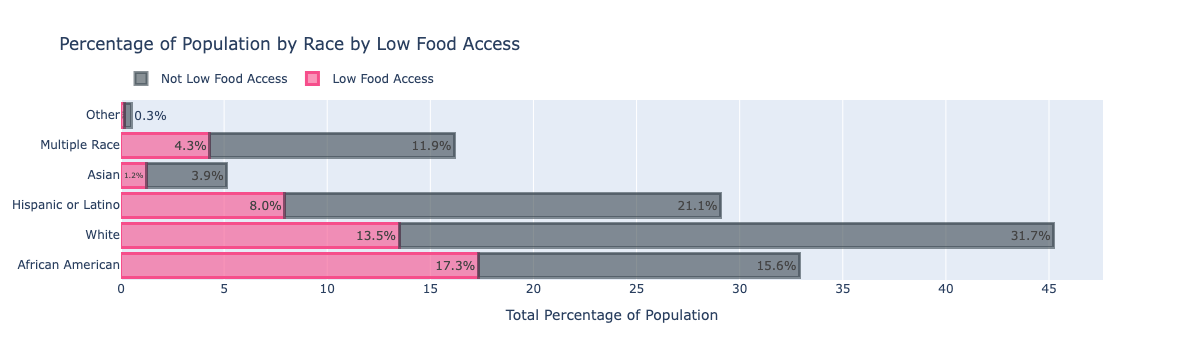

In [224]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = demographic_data_race_1,
    y = ['African American','White','Hispanic or Latino', 'Asian' ,'Multiple Race', 'Other'],
    orientation = 'h',
    name = 'Low Food Access',
    text = ['17.3%', '13.5%', '8.0%', '1.2%','4.3%','0.1%', '0%' ],
    marker = dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    x = demographic_data_race_0,
    y = ['African American','White','Hispanic or Latino', 'Asian' ,'Multiple Race', 'Other'],
    orientation = 'h',
    name = 'Not Low Food Access',
    text = ['15.6%', '31.7%', '21.1%', '3.9%', '11.9%', '0.3%','0.02%'],
    marker = dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 0.6)', width=3)
    )
))
fig.update_layout(title = 'Percentage of Population by Race by Low Food Access')
fig.update_layout(legend_orientation = 'h')
fig.update_layout(legend = dict( y = 1.2))
fig.update_layout(barmode = 'stack')
fig.update_xaxes(title = 'Total Percentage of Population')
fig.show(); 

In [123]:
demographic_data_age_1= []
demographic_data_age_0 = []

for col in demographics_age:
    temp_percentage = 100 * (food_obesity.groupby('LATracts_half')[col].sum()/total_pop)
    demographic_data_age_1.append(temp_percentage[1])
    demographic_data_age_0.append(temp_percentage[0])  

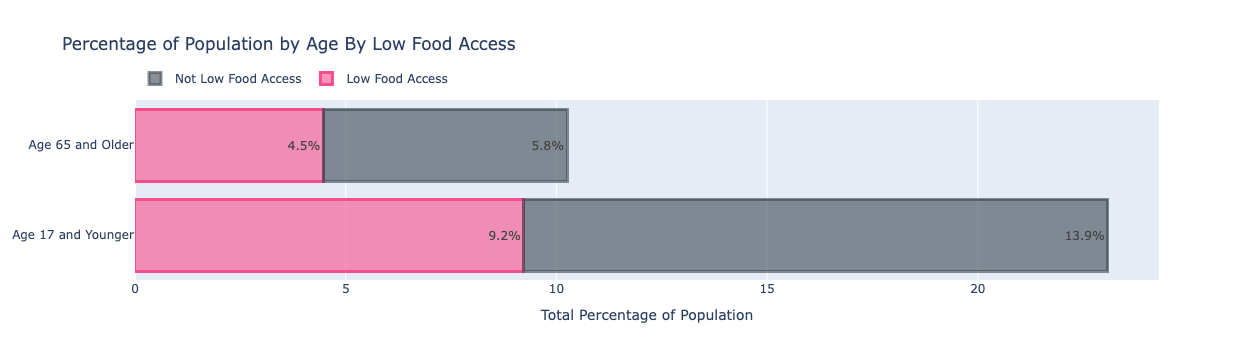

In [189]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = demographic_data_age_1,
    y = ['Age 17 and Younger', 'Age 65 and Older'],
    orientation = 'h',
    name = 'Low Food Access',
    text = ['9.2%','4.5%'],
    marker = dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    x = demographic_data_age_0,
    y = ['Age 17 and Younger', 'Age 65 and Older'],
    orientation = 'h',
    name = 'Not Low Food Access',
    text = ['13.9%','5.8%'],
    marker = dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 0.6)', width=3)
    )
))
fig.update_layout(title = 'Percentage of Population by Age By Low Food Access')
fig.update_layout(legend_orientation = 'h')
fig.update_layout(legend = dict( y = 1.2))
fig.update_layout(barmode = 'stack')
fig.update_xaxes(title = 'Total Percentage of Population ')
fig.show(); 

In [213]:
num_tract = food_obesity['Tract'].count()
vehicle_access = food_obesity['HUNVFlag'].value_counts()
vehicle_access_1 = vehicle_access[1]
vehicle_access_0 = vechile_access[0]

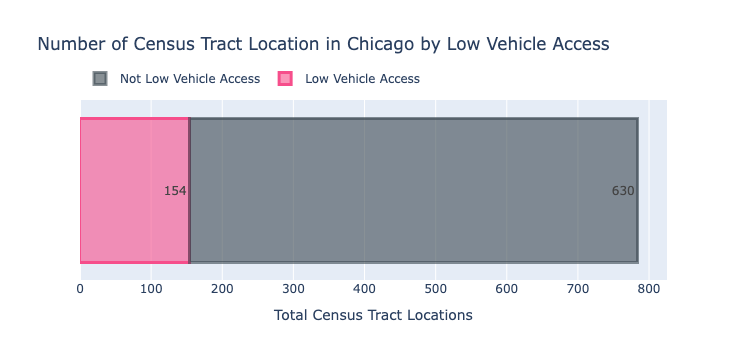

In [216]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = [vehicle_access_1],
    y = ['Vehicle Access'],
    orientation = 'h',
    name = 'Low Vehicle Access',
    text = ['154'],
    marker = dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))

fig.add_trace(go.Bar(
    x = [vehicle_access_0],
    y = ['Vehicle Access'],
    orientation = 'h',
    name = 'Not Low Vehicle Access',
    text = ['630'],
    marker = dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 0.6)', width=3)
    )    
))

fig.update_layout(title = 'Number of Census Tract Location in Chicago by Low Vehicle Access')
fig.update_layout(legend_orientation = 'h')
fig.update_layout(legend = dict( y = 1.2))
fig.update_layout(barmode = 'stack') 
fig.update_yaxes(title ='', showticklabels = False)
fig.update_xaxes(title = 'Total Census Tract Locations')
fig.show();